<a href="https://colab.research.google.com/github/somkheartk/Angular101/blob/master/FaceRecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ทำการติดตั้ง Library ที่ชื่อว่า face_recognition




In [15]:
!pip install face_recognition

# สร้าง Folder ชื่อว่า Train เพื่อแล้วนำภาพที่ต้องการเทรนใส่ไว้ใน Folder ดังกล่าว



```
# !mkdir train เป็นคำสั่งในการสร้าง Folder
# !wget เป็นคำสั่งในการดาวน์โหลดไฟล์
```






In [16]:
!mkdir train
!wget https://upload.wikimedia.org/wikipedia/commons/e/ed/Elon_Musk_Royal_Society.jpg -O train/elon.jpg
!wget https://pbs.twimg.com/profile_images/988775660163252226/XpgonN0X_400x400.jpg -O train/bill.jpg
!wget https://pmcvariety.files.wordpress.com/2017/05/mark-zuckerberg.jpg?w=681&h=383&crop=1 -O train/mark.jpg
!wget https://pmcvariety.files.wordpress.com/2017/05/mark-zuckerberg.jpg?w=681&h=383&crop=1 -O train/mark.jpg
!wget https://3.bp.blogspot.com/-pyVwVBd6vsQ/WStJ-J5x7JI/AAAAAAAAsaw/xUWis7e7Bpkcg3OfLzYJ2sQXD1sRU5OAACLcB/s1600/18664445_1352190224867311_3162624558695879092_n.jpg -O train/pruyut.jpg

mkdir: cannot create directory ‘train’: File exists
--2021-01-29 16:13:10--  https://upload.wikimedia.org/wikipedia/commons/e/ed/Elon_Musk_Royal_Society.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 208.80.154.240, 2620:0:861:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|208.80.154.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 239507 (234K) [image/jpeg]
Saving to: ‘train/elon.jpg’

train/elon.jpg      100%[===================>] 233.89K  --.-KB/s    in 0.008s  

2021-01-29 16:13:10 (28.2 MB/s) - ‘train/elon.jpg’ saved [239507/239507]

--2021-01-29 16:13:10--  https://pbs.twimg.com/profile_images/988775660163252226/XpgonN0X_400x400.jpg
Resolving pbs.twimg.com (pbs.twimg.com)... 184.31.3.237, 2606:2800:220:13d:2176:94a:948:148e
Connecting to pbs.twimg.com (pbs.twimg.com)|184.31.3.237|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23065 (23K) [image/jpeg]
Saving to: ‘train/bill.jpg’

train/bill.

# สร้าง Folder ชื่อว่า **Test** เพื่อแล้วนำภาพที่ต้องการทดสอบใส่ไว้ใน Folder นี้

In [17]:
!mkdir test
!wget  https://upload.wikimedia.org/wikipedia/commons/a/a0/Bill_Gates_2018.jpg -O test/2.jpg
!wget  https://upload.wikimedia.org/wikipedia/commons/thumb/e/ee/H.E._General_Prayut_Chan-o-cha%2C_Prime_Minister%2C_Kingdom_of_Thailand_%2834148528741%29_cropped.jpg/494px-H.E._General_Prayut_Chan-o-cha%2C_Prime_Minister%2C_Kingdom_of_Thailand_%2834148528741%29_cropped.jpg -O test/3.jpg


mkdir: cannot create directory ‘test’: File exists
--2021-01-29 16:13:11--  https://upload.wikimedia.org/wikipedia/commons/a/a0/Bill_Gates_2018.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 208.80.154.240, 2620:0:861:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|208.80.154.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 318220 (311K) [image/jpeg]
Saving to: ‘test/2.jpg’

test/2.jpg          100%[===================>] 310.76K  --.-KB/s    in 0.009s  

2021-01-29 16:13:11 (34.6 MB/s) - ‘test/2.jpg’ saved [318220/318220]

--2021-01-29 16:13:11--  https://upload.wikimedia.org/wikipedia/commons/thumb/e/ee/H.E._General_Prayut_Chan-o-cha%2C_Prime_Minister%2C_Kingdom_of_Thailand_%2834148528741%29_cropped.jpg/494px-H.E._General_Prayut_Chan-o-cha%2C_Prime_Minister%2C_Kingdom_of_Thailand_%2834148528741%29_cropped.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 208.80.154.240, 2620:0:861:ed1a::2:b
Connecting to upload.

# ทดสอบทีละภาพจะได้ผลลัพธ์ดังภาพด้านล่าง

Processing 3.jpg
[0.55123796 0.70038245 0.72445283]


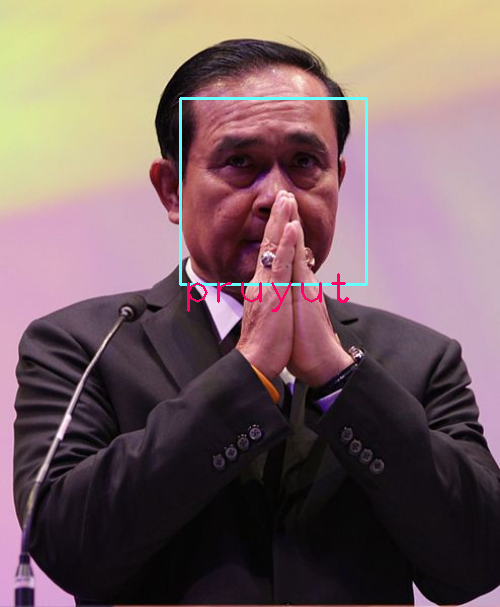

Processing 2.jpg
[0.7588698  0.81563798 0.33844834]


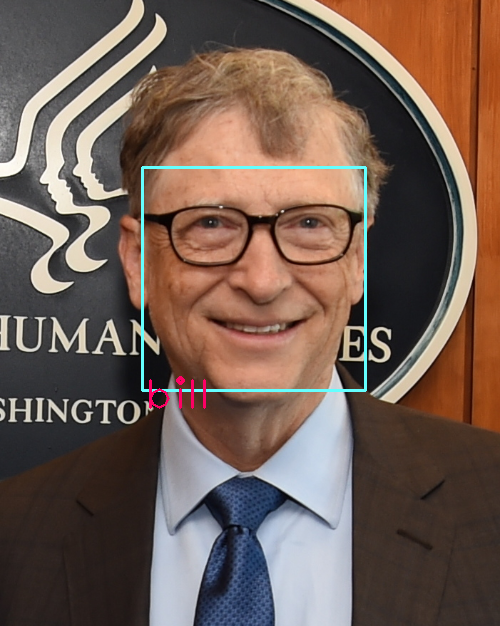

In [18]:
import face_recognition
import cv2
import os
from google.colab.patches import cv2_imshow
def read_img(path):
  img = cv2.imread(path)
  (h,w) = img.shape[:2]
  width = 500
  ratio = width / float(w)
  height = int(h * ratio)
  return cv2.resize(img,(width,height))
known_encodings = []
known_names = []
known_dir = 'train'
for file in os.listdir(known_dir):
  img = read_img(known_dir + '/' + file)
  img_enc = face_recognition.face_encodings(img)[0]
  known_encodings.append(img_enc)
  known_names.append(file.split('.')[0])

unknown_dir = 'test'
for file in os.listdir(unknown_dir):
  print("Processing",file)
  image_path=unknown_dir + '/' + file
  try:
    img = read_img(image_path)
    img_enc = face_recognition.face_encodings(img)[0]
    results = face_recognition.compare_faces(known_encodings,img_enc)
    print(face_recognition.face_distance(known_encodings,img_enc))
    res = [i for i, val in enumerate(results) if val] 
    name = known_names[res[0]]
    (top,right,bottom,left) = face_recognition.face_locations(img)[0]
    cv2.rectangle(img,(left,top),(right,bottom),(255,255,100),2)
    cv2.putText(img,name,(left+2,bottom+20),cv2.FONT_HERSHEY_PLAIN,3,(100,0,255),2)
    cv2_imshow(img)
  except:
    print(image_path+" error")